In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
data_raw = pd.read_csv('prepped_data.csv', low_memory=False)

(data_raw)

,Unnamed: 0,policy_nr_hashed,welcome_discount,last_data_year,first_data_year,churn,control_group,first_premium,last_premium,first_split,...,accident_years,last_year_car_change,last_change_premium_abs,last_change_premium_perc,years_since_last_car_change,n_last_vs_peak,last_vs_first_split,lpa,cum_change_premium_abs,cum_change_premium_perc
0,0,0WK709p,1.0,2022,2022,0,no WD and no LPA,4178.496,4178.496,0.829849,...,0.0,0.0,NaN,NaN,NaN,0,0.000000,0,0.000,0.000000
1,1,0WK70kZ,1.0,2022,2022,0,WD and no LPA,4171.776,4171.776,0.829575,...,0.0,2023.0,NaN,NaN,-1.0,0,0.000000,0,0.000,0.000000
2,2,0WK72B5,1.0,2022,2022,0,WD and no LPA,3792.768,3792.768,0.812544,...,0.0,0.0,NaN,NaN,NaN,0,0.000000,0,0.000,0.000000
3,3,0WK72VZ,0.9,2022,2022,0,WD and no LPA,2342.592,2342.592,1.000000,...,0.0,0.0,NaN,NaN,NaN,0,0.000000,0,0.000,0.000000
4,4,0WK72gq,1.0,2022,2022,0,WD and no LPA,3810.240,3810.240,0.813404,...,0.0,0.0,NaN,NaN,NaN,0,0.000000,0,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29507,29507,zPmyxXA,1.0,2022,2021,0,WD and no LPA,4284.672,4233.600,0.836888,...,0.0,0.0,-51.072,-0.011920,NaN,0,-0.004825,0,-51.072,-0.011920
29508,29508,zPmyyWO,1.0,2022,2021,1,no WD and no LPA,8041.152,8215.200,0.917419,...,0.0,0.0,174.048,0.021645,NaN,0,0.000414,0,174.048,0.021645
29509,29509,zPmyydl,1.0,2023,2021,0,WD and LPA,3186.624,3968.832,1.000000,...,0.0,2022.0,-13.440,-0.003375,1.0,0,0.000000,1,782.208,0.245466
29510,29510,zPmyynd,1.0,2021,2021,1,no WD and no LPA,17485.440,17485.440,1.000000,...,0.0,0.0,NaN,NaN,NaN,0,0.000000,0,0.000,0.000000


In [2]:

data_raw = data_raw[data_raw['welcome_discount'] == 1.0]

data_raw = data_raw.dropna(axis=1)
categorical_columns = ['last_brand', 'last_type', 'last_fuel_type']
data_raw = pd.get_dummies(data_raw, columns=categorical_columns)
columns_to_drop = ['Unnamed: 0', 'policy_nr_hashed', 'last_data_year', 'first_data_year', 'control_group', 'last_product']
data = data_raw.drop(columns=columns_to_drop, axis=1)

# Rest of your code
y = data['churn']
X = data.drop('churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=10,
                           loss_function='Logloss',
                           auto_class_weights='Balanced',  # This will handle the class imbalance
                           random_state=42)  # For reproducibility

model.fit(X_train, y_train, verbose=False)

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')

print("Confusion Matrix:\n", cm)
print("F1 Score:", f1)

Confusion Matrix:
 [[3065  595]
 [ 110  100]]
F1 Score: 0.8601798547863917


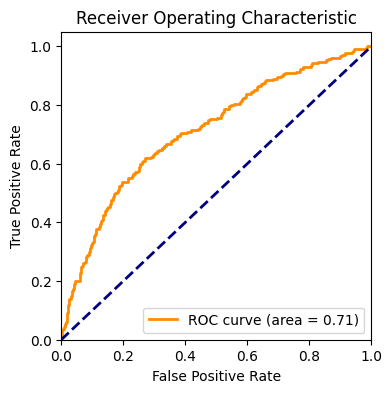

In [3]:
probabilities = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [4]:
print("Confusion Matrix:\n", cm)
print("F1 Score:", f1)

Confusion Matrix:
 [[3065  595]
 [ 110  100]]
F1 Score: 0.8601798547863917


In [9]:
np.sum(cm[0]) + np.sum(cm[1])

3870

In [12]:
len(data) * 0.2

3869.6000000000004

In [13]:
data

,welcome_discount,churn,first_premium,last_premium,first_split,last_split,last_customer_age,last_accident_free_years,last_car_value,last_age_car,...,last_type_ZAFIRA TOURER,last_type_ZOE,last_type_ZS,last_type_ZT,last_fuel_type_anders,last_fuel_type_benzine,last_fuel_type_diesel,last_fuel_type_electro,last_fuel_type_gas,last_fuel_type_hybride
0,1.0,0,4178.496,4178.496,0.829849,0.829849,36,0,478004.8,29,...,0,0,0,0,0,1,0,0,0,0
1,1.0,0,4171.776,4171.776,0.829575,0.829575,47,16,236454.4,21,...,0,0,0,0,0,1,0,0,0,0
2,1.0,0,3792.768,3792.768,0.812544,0.812544,61,0,266918.4,1,...,0,0,0,0,0,0,0,1,0,0
4,1.0,0,3810.240,3810.240,0.813404,0.813404,59,20,584584.0,18,...,0,0,0,0,0,1,0,0,0,0
5,1.0,0,8104.320,8104.320,0.912769,0.912769,24,2,120400.0,15,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29507,1.0,0,4284.672,4233.600,0.836888,0.832063,41,11,270614.4,16,...,0,0,0,0,0,1,0,0,0,0
29508,1.0,1,8041.152,8215.200,0.917419,0.917832,69,18,644952.0,10,...,0,0,0,0,0,0,1,0,0,0
29509,1.0,0,3186.624,3968.832,1.000000,1.000000,51,6,276404.8,24,...,0,0,0,0,0,1,0,0,0,0
29510,1.0,1,17485.440,17485.440,1.000000,1.000000,35,9,2604918.4,7,...,0,0,0,0,0,1,0,0,0,0
